In [1]:
pwd

'/Users/erikthorbeck/code/e-thorbeck/campus_emissions'

In [16]:
#reading in new dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hourly_bldg_analytics = pd.read_csv('initial_analytics/agg_building_data_hourly.csv')

hourly_bldg_analytics = pd.DataFrame(hourly_bldg_analytics)

hourly_bldg_analytics

,building_id,campus_id,timestamp,co2_from_electric,consumption,category_teaching,event_type_HVAC_Tuning,event_type_Misc,event_type_None,event_description_Decommissioned the L1 AHU,event_description_HVAC System Tuning,event_description_None,capacity,gross_floor_area,built_year,day,hour,nearest_hour,building_age
0,13.0,2.0,2019-12-16 18:00:00,24.401730,23.0205,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,18:25,18:00,25.0
1,13.0,2.0,2019-12-16 19:00:00,39.972282,37.7097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,19:00,19:00,25.0
2,13.0,2.0,2019-12-16 20:00:00,33.481054,31.5859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,20:00,20:00,25.0
3,13.0,2.0,2019-12-16 21:00:00,30.183500,28.4750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,21:00,21:00,25.0
4,13.0,2.0,2019-12-16 22:00:00,26.425588,24.9298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,22:00,22:00,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106624,62.0,1.0,2022-07-13 04:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106625,62.0,1.0,2022-07-13 05:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106626,62.0,1.0,2022-07-13 06:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106627,62.0,1.0,2022-07-13 07:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#lets make sure we have the 0 values as NaNs here

zero_count = (hourly_bldg_analytics['consumption'] == 0).sum()

zero_count

31974

In [ ]:
## It appears we did not correctly replace the 0 values with NaN values.  Thus we need to export again

<Axes: xlabel='timestamp'>

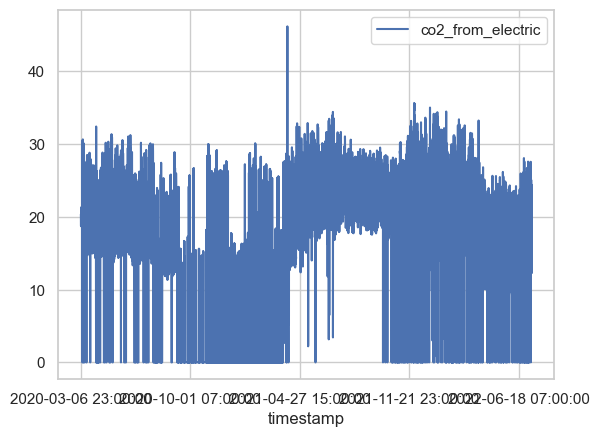

In [100]:
#plot the usage for a single building over time

single_building = 14

filtered_df = hourly_bldg_analytics[hourly_bldg_analytics['building_id'] == single_building]

filtered_df.plot(x='timestamp', y='co2_from_electric')

In [101]:
filtered_df['timestamp'].min(), filtered_df['timestamp'].max()

('2020-03-06 23:00:00', '2022-07-13 08:00:00')

<Axes: xlabel='consumption', ylabel='Count'>

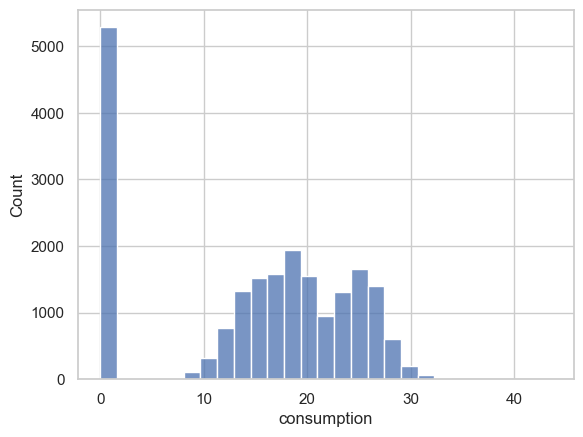

In [102]:
sns.histplot(data=filtered_df, x='consumption')

In [4]:
#now lets read in the gas data

gas_data = pd.read_csv('raw_data/gas_consumption.csv')

gas_data = pd.DataFrame(gas_data)

gas_data

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


In [8]:
#change the name of consumption to consumption_kj

gas_data.rename(columns= {'consumption_kj':'gas_consumption_kj'}, inplace=True)

gas_data

,campus_id,timestamp,gas_consumption_kj
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


In [9]:
#now convert gas_kj to kwh for analysis

gas_data['gas_consumption_kwh'] = gas_data['gas_consumption_kj'] / 3600

gas_data

,campus_id,timestamp,gas_consumption_kj,gas_consumption_kwh
0,1,2018-05-01 06:00:00,24.850209,0.006903
1,1,2018-05-01 07:00:00,26.404539,0.007335
2,1,2018-05-01 08:00:00,45.346793,0.012596
3,1,2018-05-01 09:00:00,38.383031,0.010662
4,1,2018-05-01 10:00:00,32.777705,0.009105
...,...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868,0.000159
27160,3,2021-12-27 06:00:00,0.529254,0.000147
27161,3,2021-12-27 07:00:00,1.058622,0.000294
27162,3,2021-12-28 06:00:00,1.097769,0.000305


In [10]:
#now get the c02 from gas consumption 

gas_data['co2_from_gas_kg'] = gas_data['gas_consumption_kwh'] * 0.185

gas_data

,campus_id,timestamp,gas_consumption_kj,gas_consumption_kwh,co2_from_gas_kg
0,1,2018-05-01 06:00:00,24.850209,0.006903,0.001277
1,1,2018-05-01 07:00:00,26.404539,0.007335,0.001357
2,1,2018-05-01 08:00:00,45.346793,0.012596,0.002330
3,1,2018-05-01 09:00:00,38.383031,0.010662,0.001972
4,1,2018-05-01 10:00:00,32.777705,0.009105,0.001684
...,...,...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868,0.000159,0.000029
27160,3,2021-12-27 06:00:00,0.529254,0.000147,0.000027
27161,3,2021-12-27 07:00:00,1.058622,0.000294,0.000054
27162,3,2021-12-28 06:00:00,1.097769,0.000305,0.000056


## Now we have the co2, and kwh of gas.  Next step is to combine this with the rest of the consumption data

In [ ]:
#first step is to group hourly consumption data by campus

campus_electricity_data_hourly = building_data.groupby(['campus_id', 'timestamp']).agg({
    'consumption': 'sum',
    'gross_floor_area': 'first',  # assuming gross_floor_area doesn't change within a day
    'build_year': 'first'  # assuming build_year doesn't change within a day
}).reset_index()

In [12]:
merged_gas_electric_hourly = pd.merge(hourly_bldg_analytics, gas_data, on=['campus_id', 'timestamp'], how='left')

merged_gas_electric_hourly

,building_id,campus_id,timestamp,co2_from_electric,consumption,category_teaching,event_type_HVAC_Tuning,event_type_Misc,event_type_None,event_description_Decommissioned the L1 AHU,event_description_HVAC System Tuning,event_description_None,capacity,gross_floor_area,built_year,building_age,gas_consumption_kj,gas_consumption_kwh,co2_from_gas_kg
0,13.0,2.0,2019-12-16 18:00:00,24.401730,23.0205,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,25.0,NaN,NaN,NaN
1,13.0,2.0,2019-12-16 19:00:00,39.972282,37.7097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,25.0,NaN,NaN,NaN
2,13.0,2.0,2019-12-16 20:00:00,33.481054,31.5859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,25.0,NaN,NaN,NaN
3,13.0,2.0,2019-12-16 21:00:00,30.183500,28.4750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,25.0,NaN,NaN,NaN
4,13.0,2.0,2019-12-16 22:00:00,26.425588,24.9298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106624,62.0,1.0,2022-07-13 04:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106625,62.0,1.0,2022-07-13 05:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106626,62.0,1.0,2022-07-13 06:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106627,62.0,1.0,2022-07-13 07:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
hourly_bldg_analytics.describe

<bound method NDFrame.describe of         building_id  campus_id            timestamp  co2_from_electric  \
0              13.0        2.0  2019-12-16 18:00:00          24.401730   
1              13.0        2.0  2019-12-16 19:00:00          39.972282   
2              13.0        2.0  2019-12-16 20:00:00          33.481054   
3              13.0        2.0  2019-12-16 21:00:00          30.183500   
4              13.0        2.0  2019-12-16 22:00:00          26.425588   
...             ...        ...                  ...                ...   
106624         62.0        1.0  2022-07-13 04:00:00           0.000000   
106625         62.0        1.0  2022-07-13 05:00:00           0.000000   
106626         62.0        1.0  2022-07-13 06:00:00           0.000000   
106627         62.0        1.0  2022-07-13 07:00:00           0.000000   
106628         62.0        1.0  2022-07-13 08:00:00           0.419018   

        consumption  category_teaching  event_type_HVAC_Tuning  \
0          

## We should get a metric now for how efficient the buildings are

#### this will be done by calculating co2 emissions per square foot for each bldg / campus

In [37]:
#lets just do it with electricity data first

hourly_bldg_analytics['emissions_per_sqft'] = hourly_bldg_analytics['co2_from_electric'] / hourly_bldg_analytics['gross_floor_area']

hourly_bldg_analytics

,building_id,campus_id,timestamp,co2_from_electric,consumption,category_teaching,event_type_HVAC_Tuning,event_type_Misc,event_type_None,event_description_Decommissioned the L1 AHU,event_description_HVAC System Tuning,event_description_None,capacity,gross_floor_area,built_year,day,hour,nearest_hour,building_age,emissions_per_sqft
0,13.0,2.0,2019-12-16 18:00:00,24.401730,23.0205,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,18:25,18:00,25.0,1.738015e-02
1,13.0,2.0,2019-12-16 19:00:00,39.972282,37.7097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,19:00,19:00,25.0,2.847029e-02
2,13.0,2.0,2019-12-16 20:00:00,33.481054,31.5859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,20:00,20:00,25.0,2.384690e-02
3,13.0,2.0,2019-12-16 21:00:00,30.183500,28.4750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,21:00,21:00,25.0,2.149822e-02
4,13.0,2.0,2019-12-16 22:00:00,26.425588,24.9298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1404.00,1999.0,2019-12-16,22:00,22:00,25.0,1.882164e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106624,62.0,1.0,2022-07-13 04:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106625,62.0,1.0,2022-07-13 05:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106626,62.0,1.0,2022-07-13 06:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106627,62.0,1.0,2022-07-13 07:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


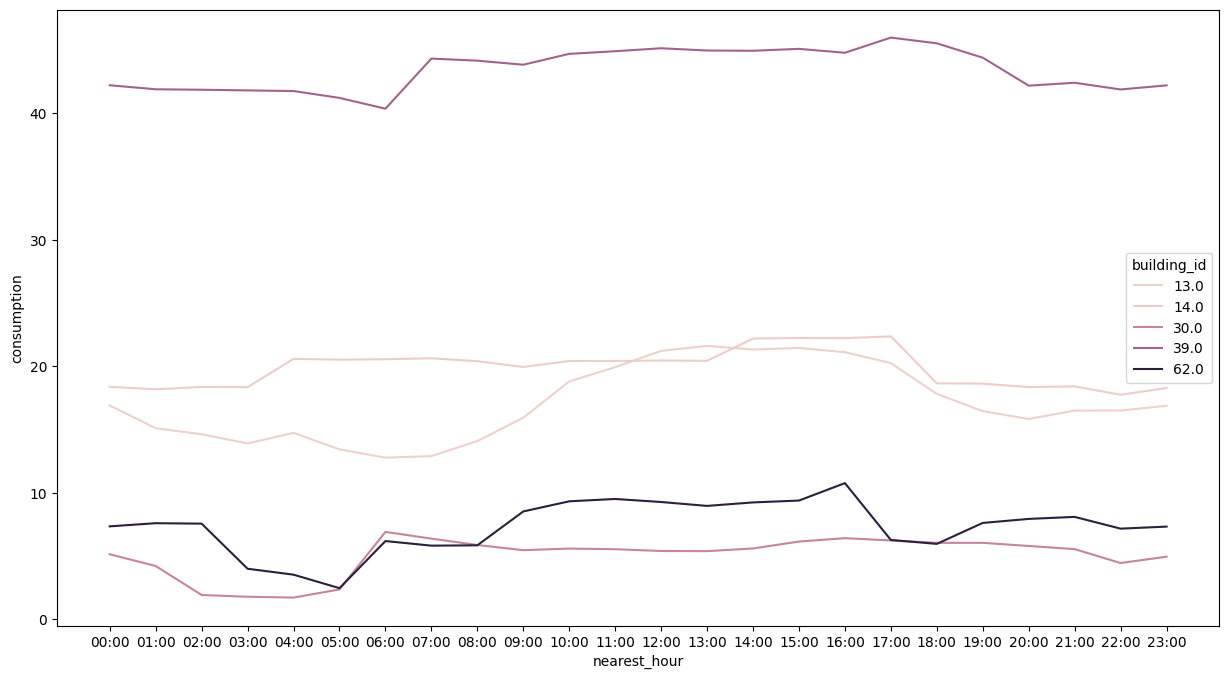

In [23]:
# Generating synthetic data for multiple buildings

building_ids = hourly_bldg_analytics['building_id']

# Group by building_id and timestamp, calculate average consumption per hour
avg_consumption_per_hour = hourly_bldg_analytics.groupby(['building_id', 'nearest_hour'])['consumption'].mean().reset_index()

avg_consumption_per_hour

plt.figure(figsize=(15, 8))  # Adjust the width and height as needed

sns.lineplot(data=avg_consumption_per_hour, x="nearest_hour", y="consumption", hue='building_id')

plt.show()

## It would appear that most buildings still consume quite a lot of energy during the night hours.  Especially Building 39

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_10026/3663813131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='building_id', y='co2_from_electric', data=hourly_bldg_analytics, palette="viridis")


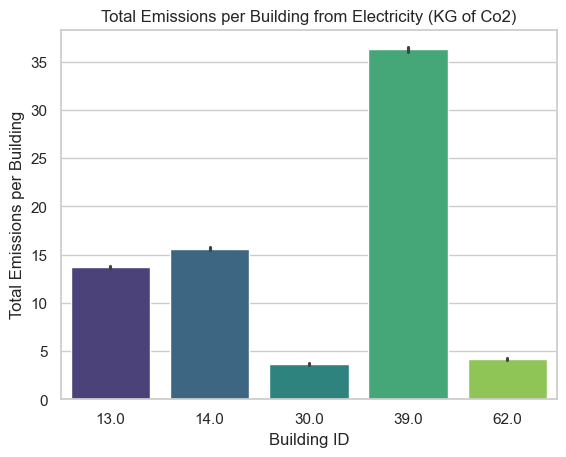

In [40]:
#next, let's look at emissions per building

import plotly.express as px

sns.set_theme(style="whitegrid")

# Create a bar plot with Seaborn
sns.barplot(x='building_id', y='co2_from_electric', data=hourly_bldg_analytics, palette="viridis")


plt.title('Total Emissions per Building from Electricity (KG of Co2)')
plt.xlabel('Building ID')
plt.ylabel('Total Emissions per Building')
plt.show()

### What else can we say about the consumption at the building level?  It seems quite low

##### Lets do a simple chart of floor area and total emissions per building

In [43]:
building_consumption = hourly_bldg_analytics.groupby('building_id')['consumption'].sum().reset_index()

building_consumption


,building_id,consumption
0,13.0,290872.2933
1,14.0,303713.7923
2,30.0,55344.2817
3,39.0,873016.9893
4,62.0,85164.2002


/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_10026/1968700244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='building_id', y='consumption', data=building_consumption, palette="viridis")


<Axes: xlabel='building_id', ylabel='consumption'>

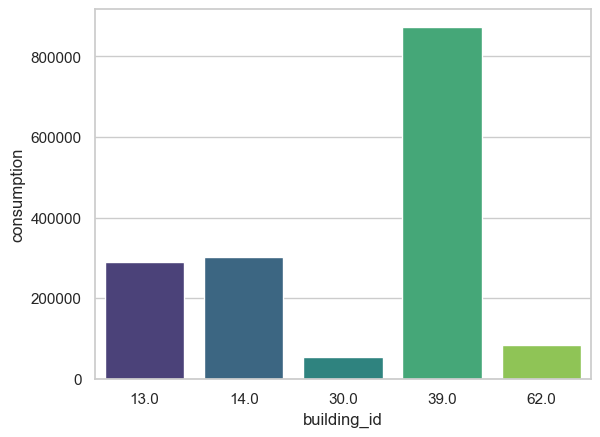

In [44]:
# this chart looks more accurate.  Let's plot it

sns.barplot(x='building_id', y='consumption', data=building_consumption, palette="viridis")

#### This looks more accurate. We can do the same with emissions per square foot 

#### I just realized we should add a calc for emissions per sqft for a certain timeframe - right now it's in terms of 1 hour.  Let's do it for a year

In [64]:
hourly_bldg_analytics['emissions_sqft_year'] = hourly_bldg_analytics['emissions_per_sqft'] * 24 * 365

hourly_bldg_analytics

,building_id,campus_id,timestamp,co2_from_electric,consumption,category_teaching,event_type_HVAC_Tuning,event_type_Misc,event_type_None,event_description_Decommissioned the L1 AHU,...,event_description_None,capacity,gross_floor_area,built_year,day,hour,nearest_hour,building_age,emissions_per_sqft,emissions_sqft_year
0,13.0,2.0,2019-12-16 18:00:00,24.401730,23.0205,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1404.00,1999.0,2019-12-16,18:25,18:00,25.0,1.738015e-02,152.250110
1,13.0,2.0,2019-12-16 19:00:00,39.972282,37.7097,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1404.00,1999.0,2019-12-16,19:00,19:00,25.0,2.847029e-02,249.399708
2,13.0,2.0,2019-12-16 20:00:00,33.481054,31.5859,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1404.00,1999.0,2019-12-16,20:00,20:00,25.0,2.384690e-02,208.898884
3,13.0,2.0,2019-12-16 21:00:00,30.183500,28.4750,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1404.00,1999.0,2019-12-16,21:00,21:00,25.0,2.149822e-02,188.324402
4,13.0,2.0,2019-12-16 22:00:00,26.425588,24.9298,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1404.00,1999.0,2019-12-16,22:00,22:00,25.0,1.882164e-02,164.877600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106624,62.0,1.0,2022-07-13 04:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106625,62.0,1.0,2022-07-13 05:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106626,62.0,1.0,2022-07-13 06:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106627,62.0,1.0,2022-07-13 07:00:00,0.000000,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
emissions_per_sqft = hourly_bldg_analytics.groupby('building_id').agg({
    'gross_floor_area': 'first',
    'emissions_per_sqft': 'mean', 
    'building_age': 'first',
    'consumption' : 'sum', 
    'emissions_sqft_year': 'mean'
}).reset_index()

emissions_per_sqft

,building_id,gross_floor_area,emissions_per_sqft,building_age,consumption,emissions_sqft_year
0,13.0,1404.00,0.012906,25.0,290872.2933,113.054471
1,14.0,1245.00,0.016881,20.0,303713.7923,147.877830
2,30.0,1466488.42,0.000004,36.0,55344.2817,0.031983
3,39.0,1356939.48,0.000034,52.0,873016.9893,0.297071
4,62.0,1274716.17,0.000006,56.0,85164.2002,0.055125


<Axes: xlabel='gross_floor_area', ylabel='emissions_per_sqft'>

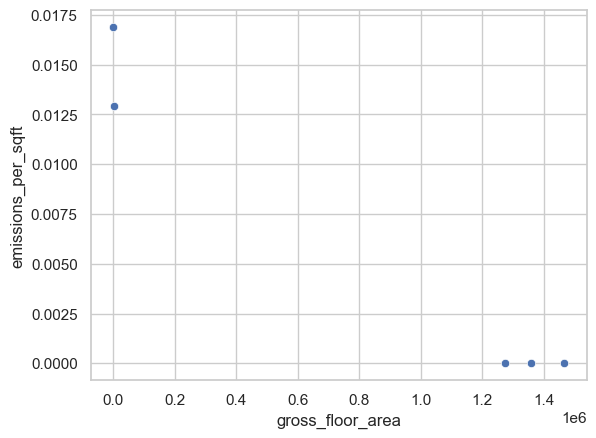

In [60]:
sns.set_theme(style="whitegrid")

sns.scatterplot(x='gross_floor_area', y='emissions_per_sqft', data=emissions_per_sqft)

## The two very small buildings are not very efficient on a per square foot basis.  The two very large ones are quite efficient.

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_10026/948783393.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='building_id', y='emissions_sqft_year', data=emissions_per_sqft, palette="viridis")


<Axes: xlabel='building_id', ylabel='emissions_sqft_year'>

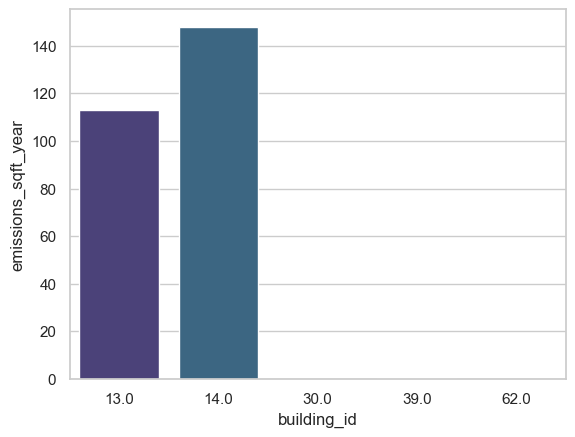

In [66]:
sns.barplot(x='building_id', y='emissions_sqft_year', data=emissions_per_sqft, palette="viridis")

/var/folders/sn/n_4jtcwd4lq3xb5r1j956lmm0000gn/T/ipykernel_10026/2078032830.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='building_id', y='emissions_per_sqft', data=hourly_bldg_analytics, palette="viridis")


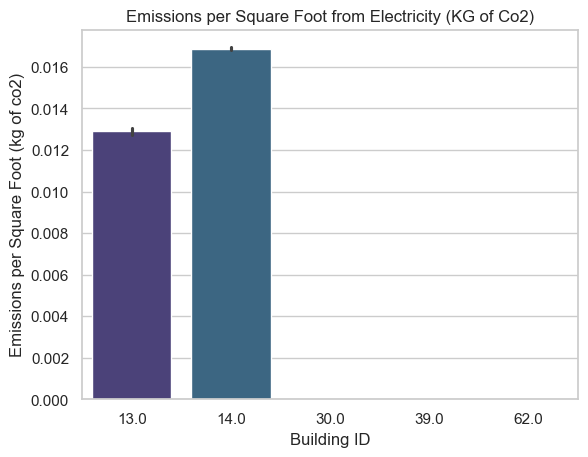

In [39]:
#now lets plot the relationship between emissions per sqft and building

import plotly.express as px

sns.set_theme(style="whitegrid")

# Create a bar plot with Seaborn
sns.barplot(x='building_id', y='emissions_per_sqft', data=hourly_bldg_analytics, palette="viridis")

plt.title('Emissions per Square Foot from Electricity (KG of Co2)')
plt.xlabel('Building ID')
plt.ylabel('Emissions per Square Foot (kg of co2)')
plt.show()

## It appears here that buildings 13 and 14 are not so efficient

#### Let's plot a scatter of emissions and gross floor area

NameError: name 'FuncFormatter' is not defined

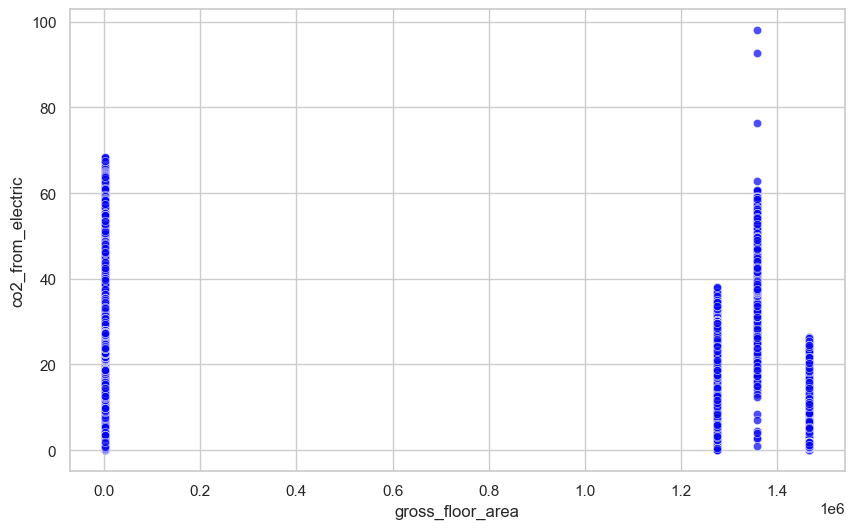

In [59]:
#scatterplot of emissions and gross floor area

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='gross_floor_area', y='co2_from_electric', data=hourly_bldg_analytics, color='blue', alpha=0.7)

# Format x-axis labels as readable numbers
def format_ticks(value, pos):
    if value < 1000:
        return f'{value:.0f}'
    elif value < 1e6:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value / 1e6:.0f}M'

scatter_plot.xaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.title('Scatter Plot of Emissions vs Gross Floor Area')
plt.xlabel('Gross Floor Area')
plt.ylabel('CO2 Emissions from Electricity')
plt.show()

## this is getting a bit confusing.  Let's get some metrics on the distribution of co2 emissions at each campus

In [62]:
#total emissions per campus first

total_emissions_electric = hourly_bldg_analytics.groupby('campus_id')['co2_from_electric'].sum()

total_emissions_electric

campus_id
1.0    1.074337e+06
2.0    6.302613e+05
Name: co2_from_electric, dtype: float64

In [64]:
#now lets do the same with gas

total_emissions_gas = gas_data.groupby('campus_id')['co2_from_gas_kg'].sum()

total_emissions_gas

campus_id
1    29.708660
3     0.587606
Name: co2_from_gas_kg, dtype: float64

## it looks like either this data is not right, or incomplete, or something

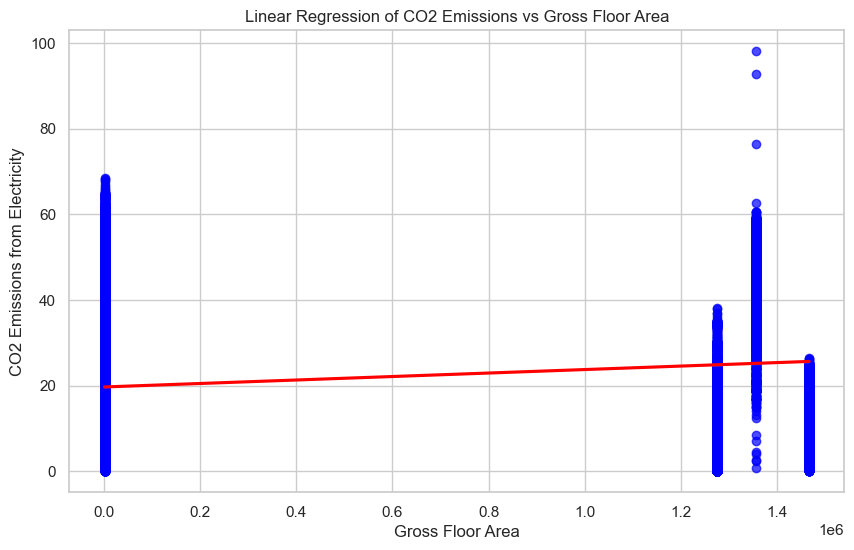

In [66]:
#here we will do a simple regression between gross floor area and co2 emissions


# Create a scatter plot with regression line using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='gross_floor_area', y='co2_from_electric', data=hourly_bldg_analytics, color='blue', scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

plt.title('Linear Regression of CO2 Emissions vs Gross Floor Area')
plt.xlabel('Gross Floor Area')
plt.ylabel('CO2 Emissions from Electricity')
plt.show()

#### it appears there is not much of a relationship here.  How about with building age?  

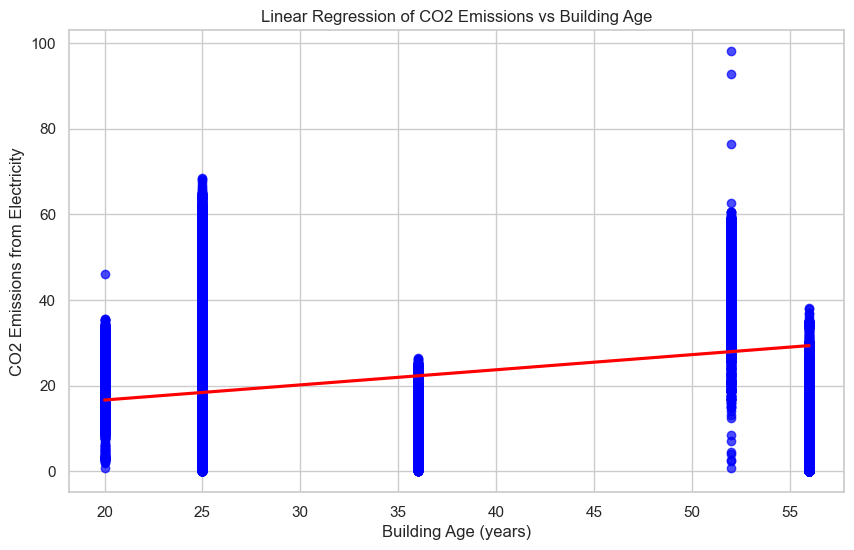

In [70]:
# Create a scatter plot with regression line using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='building_age', y='co2_from_electric', data=hourly_bldg_analytics, color='blue', scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

plt.title('Linear Regression of CO2 Emissions vs Building Age')
plt.xlabel('Building Age (years)')
plt.ylabel('CO2 Emissions from Electricity')
plt.show()

#### there is a bit more of a relationship, but hard to say if this is actually linear.  Probably not

We can do a pearson correlation coefficient test next

In [ ]:
#first we need to get the chart summarized into just numerical values

<Axes: >

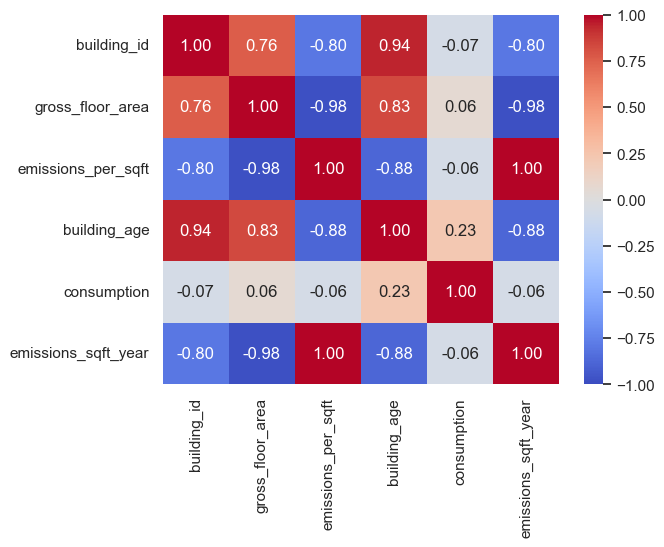

In [75]:
correlation_matrix = emissions_per_sqft.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

In [79]:
#import the scaled data

scaled_hourly_bldg_data = pd.read_csv('scaled_data/agg_building_data_hourly_encoded_scaled_11JAN.csv')

scaled_hourly_bldg_data = pd.DataFrame(scaled_hourly_bldg_data)

scaled_hourly_bldg_data

,building_id,campus_id,timestamp,co2_from_electric,consumption,category_teaching,event_type_HVAC_Tuning,event_type_Misc,event_type_None,event_description_Decommissioned the L1 AHU,...,event_description_None,capacity,gross_floor_area,built_year,day,hour,nearest_hour,building_age,emissions_per_sqft,emissions_per_sqft_yearly
0,13.0,2.0,2019-12-16 18:00:00,0.641047,0.641047,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,-0.939343,0.407407,2019-12-16,18:25,18:00,-0.407407,1.306544,1.306544
1,13.0,2.0,2019-12-16 19:00:00,1.212952,1.212952,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,-0.939343,0.407407,2019-12-16,19:00,19:00,-0.407407,2.142002,2.142002
2,13.0,2.0,2019-12-16 20:00:00,0.974530,0.974530,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,-0.939343,0.407407,2019-12-16,20:00,20:00,-0.407407,1.793707,1.793707
3,13.0,2.0,2019-12-16 21:00:00,0.853411,0.853411,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,-0.939343,0.407407,2019-12-16,21:00,21:00,-0.407407,1.616772,1.616772
4,13.0,2.0,2019-12-16 22:00:00,0.715383,0.715383,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,-0.939343,0.407407,2019-12-16,22:00,22:00,-0.407407,1.415136,1.415136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106624,62.0,1.0,2022-07-13 04:00:00,-0.255226,-0.255226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106625,62.0,1.0,2022-07-13 05:00:00,-0.255226,-0.255226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106626,62.0,1.0,2022-07-13 06:00:00,-0.255226,-0.255226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106627,62.0,1.0,2022-07-13 07:00:00,-0.255226,-0.255226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
emissions_output_scaled = scaled_hourly_bldg_data.groupby('building_id').agg({
    'gross_floor_area': 'first',
    'building_age': 'first',
    'consumption' : 'sum', 
    'emissions_per_sqft_yearly': 'mean', 
    'co2_from_electric': 'sum'
}).reset_index()

emissions_output_scaled

,building_id,gross_floor_area,building_age,consumption,emissions_per_sqft_yearly,co2_from_electric
0,13.0,-0.939343,-0.407407,5569.131347,0.969472,5569.131347
1,14.0,-0.939460,-0.592593,6566.533442,1.268943,6566.533442
2,30.0,0.141473,0.000000,-1962.802232,-0.002488,-1962.802232
3,39.0,0.060657,0.592593,27479.466223,-0.000209,27479.466223
4,62.0,0.000000,0.740741,-2257.100873,-0.002289,-2257.100873


<Axes: >

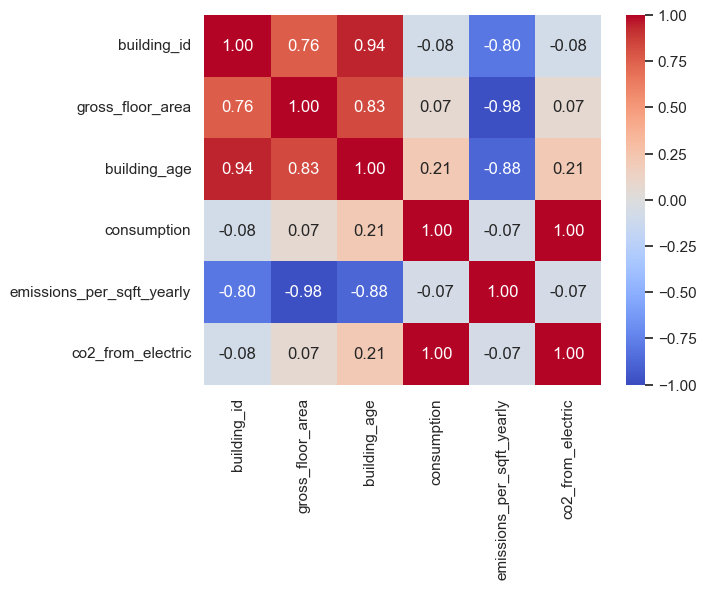

In [84]:
correlation_matrix_scaled = emissions_output_scaled.corr()

sns.heatmap(correlation_matrix_scaled, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

### Now we have linear coefficients.  Let's see what we can do with Shapley Values

In [73]:
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost

# !pip install shap
import shap
# Run the following command. Needed for some visualizations.
shap.initjs();

In [74]:
import matplotlib

NameError: name 'shap_values_one' is not defined

In [95]:
# Load the data

X = scaled_hourly_bldg_data.drop(['consumption','co2_from_electric', 'emissions_per_sqft_yearly', 'emissions_per_sqft', 'timestamp','nearest_hour', 'day', 'hour'], axis=1)
y = scaled_hourly_bldg_data['consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Fit our model
model_tree = xgboost.XGBRegressor(n_estimators=100, max_depth=2)
model_tree.fit(X_train, y_train)

# Predict
y_test_pred = model_tree.predict(X_test)

In [98]:
#lets look at the predictions

y_train.mean()


# Have a look at the mean squared error on the test set
mse = mean_squared_error(y_test, y_test_pred)
print(f"The Mean Squared Error on the test set is   {mse:.3f}")

The Mean Squared Error on the test set is   0.075


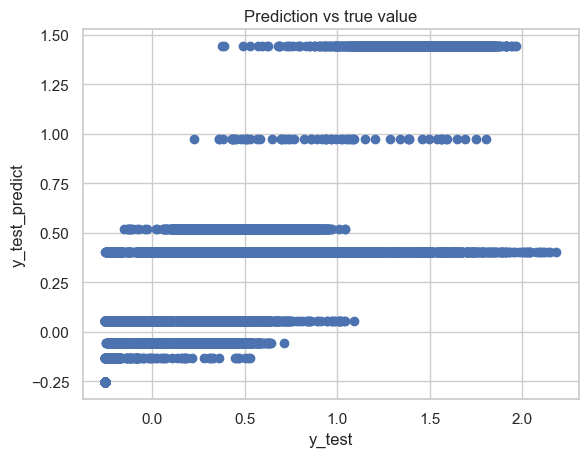

In [99]:
# Let's check our predictions on the test set visually
plt.scatter(y_test, y_test_pred)
plt.title("Prediction vs true value")
plt.xlabel("y_test"); plt.ylabel("y_test_predict");

In [100]:
row_to_show = 24  # Select one instance to explain
feature_values = X_test.iloc[[row_to_show]]
prediction = model_tree.predict(feature_values)
print(f"{'The prediction for this instance:':<35}{prediction[0]:>7.3f}")

The prediction for this instance:   -0.057


In [101]:
# Step 1: Create a SHAP Explainer
explainer = shap.Explainer(model_tree)

[15:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [102]:
# Step 2: Calculate the SHAP values
# Using the explainer we just created
# and giving as input the feature values for our instance
shap_values_one = explainer(feature_values)

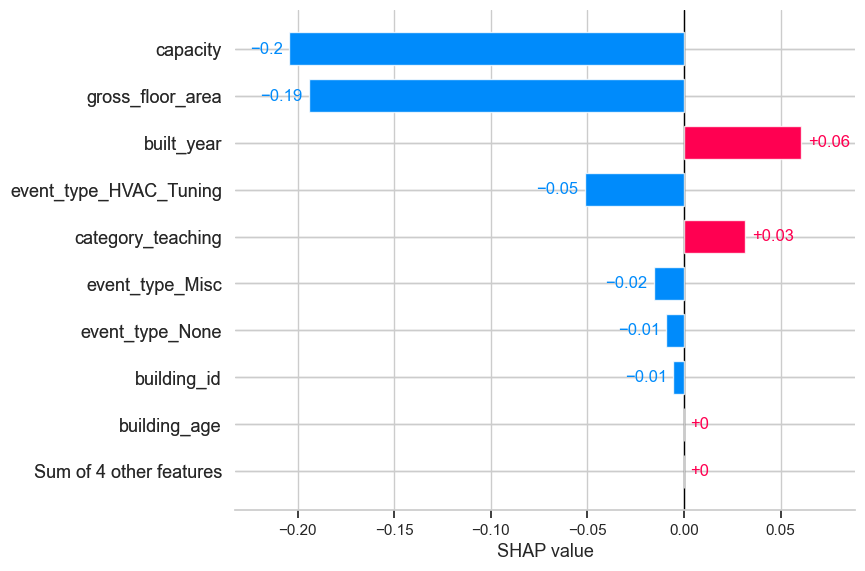

In [104]:
shap.plots.bar(shap_values_one[0])

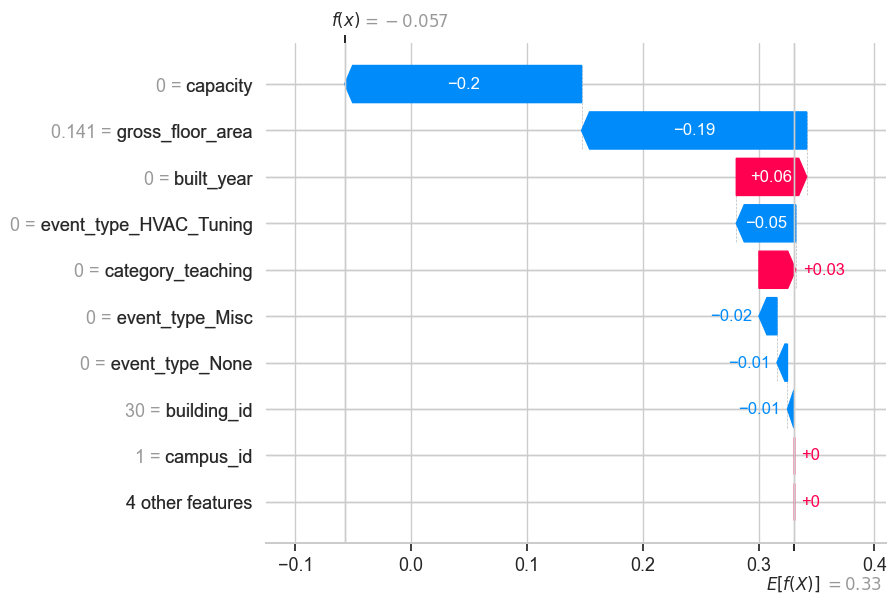

In [105]:
shap.plots.waterfall(shap_values_one[0])


## Now with global variables

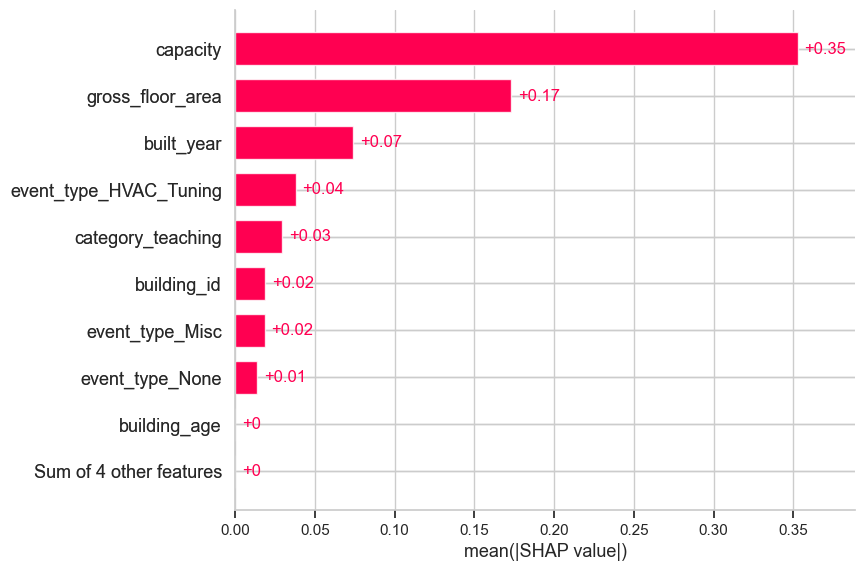

In [107]:
shap_values = explainer(X_test)

shap.plots.bar(shap_values)